In [73]:
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from causal_discovery.algorithms.ic_algorithm import IC_Algorithm
from causal_discovery.independence_tests.robust_regression_test import RobustRegressionTest

In [3]:
import numpy
import pandas as pd

# generate some toy data:
SIZE = 2000
x1 = numpy.random.normal(size=SIZE)
x2 = x1 + numpy.random.normal(size=SIZE)
x3 = x1 + numpy.random.normal(size=SIZE)
x4 = x2 + x3 + numpy.random.normal(size=SIZE)
x5 = x4 + numpy.random.normal(size=SIZE)

# load the data into a dataframe:
X = pd.DataFrame({'x1' : x1, 'x2' : x2, 'x3' : x3, 'x4' : x4, 'x5' : x5})
X

,x1,x2,x3,x4,x5
0,-1.897639,-1.862227,-2.522464,-4.596629,-5.886762
1,-1.751418,-2.731170,-1.910944,-4.969392,-7.578052
2,-0.593100,-1.303646,-0.436688,-2.597756,-1.830048
3,-2.342328,-3.313723,-2.677997,-7.732253,-7.385874
4,0.205197,-0.221555,-0.517074,-1.518505,-0.729668
...,...,...,...,...,...
1995,1.081585,3.048940,2.377519,6.592103,4.996040
1996,-0.157080,-1.180440,-1.609417,-0.969816,-1.985838
1997,0.456409,0.337147,0.296034,0.143600,0.753207
1998,-0.993152,-0.379078,-2.534940,-3.540044,-4.649770


In [4]:
# https://medium.com/@akelleh/causal-graph-inference-b3e3afd47110
    
# define the variable types: 'c' is 'continuous'.  The variables defined here
# are the ones the search is performed over  -- NOT all the variables defined
# in the data frame.
variable_types = {'x1' : 'c', 'x2' : 'c', 'x3' : 'c', 'x4' : 'c', 'x5' : 'c'}

# run the search
ic_algorithm = IC_Algorithm(RobustRegressionTest)
graph = ic_algorithm.search(X, variable_types)


In [5]:
print(graph.nodes())

['x1', 'x2', 'x3', 'x4', 'x5']


In [6]:
print(graph.edges())

[('x1', 'x2'), ('x1', 'x3'), ('x2', 'x4'), ('x3', 'x4'), ('x4', 'x5')]


In [30]:
graph.edges(data=True)

EdgeDataView([(0, 1, {'weight': -0.19222573405881005}), (0, 3, {'weight': 0.40127235512353476}), (0, 2, {'weight': -0.3377833014624446}), (1, 3, {'weight': 0.3368615601805958}), (1, 2, {'weight': 0.3373563826843396}), (2, 3, {'weight': 0.3305363077201405})])

/home/seamus/bin/anaconda3/envs/CAUSAL1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


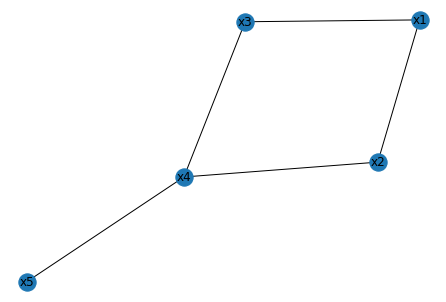

In [7]:
nx.draw(graph, with_labels=True)

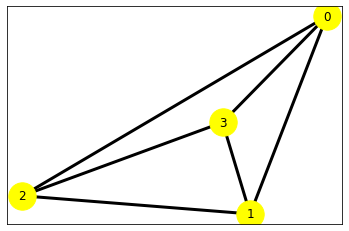

In [27]:
options = {
    'node_color': 'yellow',
    'node_size': 750,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 50,
}
nx.draw_networkx(graph, arrows=True, **options)

In [8]:
from causal_discovery.algorithms.lingam_algorithm import LiNGAM_GC_Algorithm

In [16]:
X, test_adjacency_matrix, test_causal_order = LiNGAM_GC_Algorithm.generate_test_gcm(4, 3)
model = LiNGAM_GC_Algorithm()
model.fit(X)
causal_order, adjacency_matrix= model.get_results()

Estimated causal order
[3, 1, 0, 2]
Estimated graph structure
[[ 0.         -0.19222573  0.          0.40127236]
 [ 0.          0.          0.          0.33686156]
 [-0.3377833   0.33735638  0.          0.33053631]
 [ 0.          0.          0.          0.        ]]


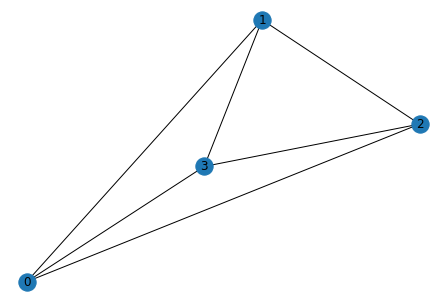

In [32]:
graph2 = nx.from_numpy_matrix(adjacency_matrix)
nx.draw(graph2, with_labels=True)

In [33]:
graph2.edges(data=True)

EdgeDataView([(0, 1, {'weight': -0.19222573405881005}), (0, 3, {'weight': 0.40127235512353476}), (0, 2, {'weight': -0.3377833014624446}), (1, 3, {'weight': 0.3368615601805958}), (1, 2, {'weight': 0.3373563826843396}), (2, 3, {'weight': 0.3305363077201405})])

In [129]:
labels = nx.get_edge_attributes(graph2, 'weight')
labels_rounded = labels.copy()
for k, v in labels.items():
    labels_rounded[k] = numpy.round(v, 3)
labels_rounded

{(0, 1): -0.192,
 (0, 3): 0.401,
 (0, 2): -0.338,
 (1, 3): 0.337,
 (1, 2): 0.337,
 (2, 3): 0.331}

{(0, 1): Text(0.0, -0.375, '-0.192'),
 (0, 3): Text(-0.5, -0.125, '0.401'),
 (0, 2): Text(-0.5, 0.125, '-0.338'),
 (1, 3): Text(0.5, -0.125, '0.337'),
 (1, 2): Text(0.5, 0.125, '0.337'),
 (2, 3): Text(0.0, 0.375, '0.331')}

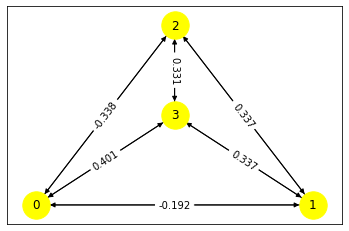

In [133]:
graph2 = nx.DiGraph(graph2)
options = {
    'node_color': 'yellow',
    'node_size': 750,
    'width': 1,
    'arrowstyle': '-|>',
}
# pos = nx.spring_layout(digraph2)  # positions for all nodes
pos = nx.planar_layout(graph2)
nx.draw_networkx(graph2, arrows=True, pos=pos, **options)
nx.draw_networkx_edge_labels(graph2, pos, edge_labels=labels_rounded)

In [140]:
graph2.nodes(data=True)

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}})

In [ ]:
digraph2 = nx.DiGraph(graph2)

{(0, 1): Text(0.0, -0.375, '-0.19222573405881005'),
 (0, 3): Text(-0.5, -0.125, '0.40127235512353476'),
 (0, 2): Text(-0.5, 0.125, '-0.3377833014624446'),
 (1, 0): Text(0.0, -0.375, '-0.19222573405881005'),
 (1, 3): Text(0.5, -0.125, '0.3368615601805958'),
 (1, 2): Text(0.5, 0.125, '0.3373563826843396'),
 (2, 0): Text(-0.5, 0.125, '-0.3377833014624446'),
 (2, 1): Text(0.5, 0.125, '0.3373563826843396'),
 (2, 3): Text(0.0, 0.375, '0.3305363077201405'),
 (3, 0): Text(-0.5, -0.125, '0.40127235512353476'),
 (3, 1): Text(0.5, -0.125, '0.3368615601805958'),
 (3, 2): Text(0.0, 0.375, '0.3305363077201405')}

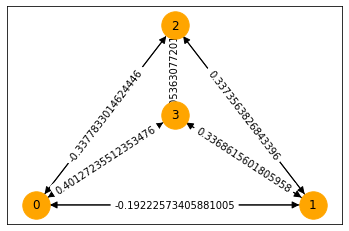

In [111]:
labels = nx.get_edge_attributes(digraph2, 'weight')
options = {
    'node_color': 'orange',
    'node_size': 750,
    'arrowsize': 15,
}
# pos = nx.spring_layout(digraph2)  # positions for all nodes
pos = nx.planar_layout(digraph2)
nx.draw_networkx(digraph2, arrows=True, pos=pos, **options)
nx.draw_networkx_edge_labels(digraph2, pos, edge_labels=labels)

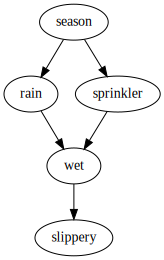

In [2]:
from causalgraphicalmodels import CausalGraphicalModel


sprinkler = CausalGraphicalModel(
    nodes=["season", "rain", "sprinkler", "wet", "slippery"],
    edges=[
        ("season", "rain"), 
        ("season", "sprinkler"), 
        ("rain", "wet"),
        ("sprinkler", "wet"), 
        ("wet", "slippery")
    ]
)

# draw return a graphviz `dot` object, which jupyter can render
sprinkler.draw()


In [3]:
print(sprinkler.get_distribution())

P(season)P(sprinkler|season)P(rain|season)P(wet|rain,sprinkler)P(slippery|wet)


In [7]:
sprinkler.get_distribution()

'P(season)P(sprinkler|season)P(rain|season)P(wet|rain,sprinkler)P(slippery|wet)'